# Exercise Numpy/Scipy

### 3. Parameter fitting

You have been provided with an experimenal time-course measurement of the X and Y species. The data has the form of a numpy array with the first column representing the experimental time (in seconds), column 2 the measurement of X (in mM) and column 3 Y.

* modify the `dSdt` function from above, such that a parameter vector `p`$= [k1, k2, k3]$ can be passed in addition to `S` and `t`

* define an objective function `obj_fct( p, S_exp, t_exp )` which computes the squared distance between the experimental data and a model simulation for the parameters `p`$= [k1, k2, k3]$ for the time point vector `t_exp` (assume that the initial conditions are known and as defined above), (hint: additional arguments can be passed to the function integrated by `scipy.optimize.odeint` using the `args = (p,)` argument. Dont forget the comma in the tuple!

* try to identify the parameters of the reaction system using this objective function and the `sicipy.optimize.fmin` minimization algorithm. Fit only parameters k2 and k3 and keep k1 at 1.5. Use the parameters given above as starting values.

* plot a simulation of t

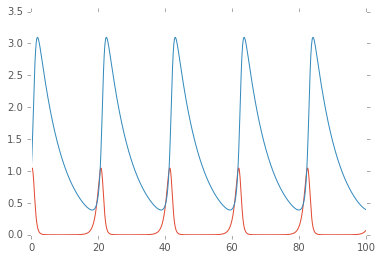

In [1]:
import numpy as np
import scipy as sp

# generate data
import scipy.integrate
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

N = np.array( [[1, -1, 0], [0, 1, -1]])
k1 = 1.5
k2 = 1.15
k3 = 0.14

def dSdt( S, t):
    X, Y = S
    v = np.zeros(3)
    v[0] = k1*X
    v[1] = k2*X*Y
    v[2] = k3*Y
    return np.dot( N, v )

time = np.arange(0,100,.1)
S0 = np.array([1, 1] )

result = scipy.integrate.odeint( dSdt, S0, time  )
plt.plot( time, result )


time = time.reshape( (1000,1) )
experimental_data = np.concatenate( (time,result), axis =1  )
import pickle
pickle.dump( experimental_data, open( "experimental_data.p", "wb" ) )
#import scipy.optimize
#experimental_data = pickle.load( open( "experimental_data.p", "rb" ) )
#plt.plot( experimental_data[:,0], experimental_data[:,1:])

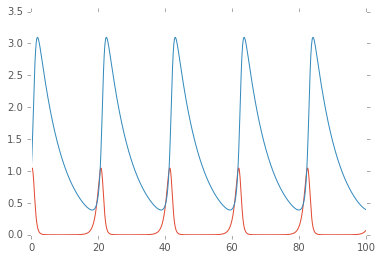

In [2]:
import pickle
import scipy.optimize
experimental_data = pickle.load( open( "experimental_data.p", "rb" ) )
plt.plot( experimental_data[:,0], experimental_data[:,1:])

In [3]:
k1 = 1.5
def dSdt( S, t, p):
    k2, k3 = p
    X, Y = S
    v = np.zeros(3)
    v[0] = k1*X
    v[1] = k2*X*Y
    v[2] = k3*Y
    return np.dot( N, v )

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 57
         Function evaluations: 113
[ 1.15004434  0.1400018 ]


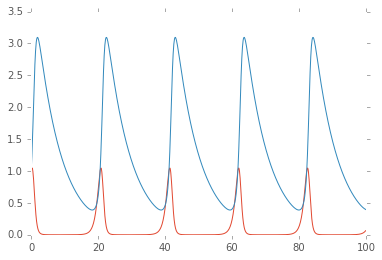

In [5]:
def obj_fct( p, S_ext, t_exp):
    sim = scipy.integrate.odeint( dSdt, S0, t_exp, args=(p,)  )
    return (np.square(S_ext - sim)).sum()

time = experimental_data[:,0]
data = experimental_data[:,1:]
p = [ 1.47, 15.316, 10.2 ]
#obj_fct( p, data, time  )

p0 = [0.8, 0.9]

p_new =  sp.optimize.fmin( obj_fct, p0, args=(data, time) )



sim = scipy.integrate.odeint( dSdt, S0, experimental_data[:,0], args=(p_new,)  )
plt.plot( experimental_data[:,0], sim )
print(p_new)
    
    